# Real Estate Price Prediction

User want to know the price of the house of unit area depends on 6 parameter as mentioned below.
Transaction date, house age, distance to the nearest MRT station, number of convenience stores in the living circle, geographic coordinate latitude, geographic coordinate longitude.

- Attribute Information:

- The inputs are as follows
- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- X2=the house age (unit: year)
- X3=the distance to the nearest MRT station (unit: meter)
- X4=the number of convenience stores in the living circle on foot (integer)
- X5=the geographic coordinate, latitude. (unit: degree)
- X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

# Importing required libraries for the project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Loading real estate dataset from git hub account

In [2]:
Realdf = pd.read_csv('https://raw.githubusercontent.com/Manju410/MLPractice/main/Real_Estate_Price_Prediction/RealEstatCleanUp.csv')

In [3]:
Realdf.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,734808,32.0,84.87882,10,24.98298,121.54024,37.9
1,734808,19.5,306.59470,9,24.98034,121.53951,42.2
2,735050,13.3,561.98450,5,24.98746,121.54391,47.3
3,735020,13.3,561.98450,5,24.98746,121.54391,54.8
4,734777,5.0,390.56840,5,24.97937,121.54245,43.1


- Number of rows and columns in the dataset

In [4]:
Realdf.shape

(414, 7)

- There are 414 rows and 8 columns in the above dataset

- Information about dataset like datatype,count etc

In [5]:
Realdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int64  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


# Summary of above output
- Above dataset contains 8 columns.
- Two columns are integer datatype and Six columns are float datatype.
- Above dataset doesnot have any null values or empty values.
- Above dataset have 414 etries total

In [7]:
X = Realdf.iloc[:, :-1]
y = Realdf.iloc[:, -1:]

In [8]:
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,734808,32.0,84.87882,10,24.98298,121.54024
1,734808,19.5,306.59470,9,24.98034,121.53951
2,735050,13.3,561.98450,5,24.98746,121.54391
3,735020,13.3,561.98450,5,24.98746,121.54391
4,734777,5.0,390.56840,5,24.97937,121.54245


In [9]:
y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [10]:
X.shape

(414, 6)

In [11]:
X_train = X.iloc[:350, :]
y_train = y.iloc[:350, :]

X_test = X.iloc[350:, :]
y_test = y.iloc[350:, :]

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
X_train.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,734808,32.0,84.87882,10,24.98298,121.54024
1,734808,19.5,306.59470,9,24.98034,121.53951
2,735050,13.3,561.98450,5,24.98746,121.54391
3,735020,13.3,561.98450,5,24.98746,121.54391
4,734777,5.0,390.56840,5,24.97937,121.54245


In [14]:
Continous_col = X_train.columns[[1,2,4,5]]
Continous_col

Index(['X2 house age', 'X3 distance to the nearest MRT station', 'X5 latitude',
       'X6 longitude'],
      dtype='object')

In [15]:
stdscaler = StandardScaler()

In [16]:
scaler = stdscaler.fit(X_train[Continous_col])

In [17]:
scaler.mean_

array([  17.95542857, 1091.0218454 ,   24.96906334,  121.53331306])

In [18]:
scaler.scale_

array([1.13390028e+01, 1.28792677e+03, 1.24797759e-02, 1.54782750e-02])

In [19]:
X_train.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,734914.077143,17.955429,1091.021845,4.048571,24.969063,121.533313
std,123.952400,11.355236,1289.770616,2.923168,0.012498,0.015500
min,734716.000000,0.000000,23.382840,0.000000,24.932930,121.473530
25%,734808.000000,9.900000,289.324800,1.000000,24.963050,121.528085
50%,734928.000000,16.200000,492.231300,4.000000,24.971100,121.538535
75%,734989.000000,29.125000,1414.837000,6.000000,24.977440,121.543438
max,735203.000000,43.800000,6488.021000,10.000000,25.014590,121.566270


In [20]:
scaler.var_

array([1.28572985e+02, 1.65875536e+06, 1.55744807e-04, 2.39576998e-04])

In [21]:
scaled_vals = scaler.transform(X_train[Continous_col])
scaled_vals[:5]

array([[ 1.23860728, -0.78121136,  1.11513678,  0.4475268 ],
       [ 0.13621757, -0.60906192,  0.90359452,  0.40036392],
       [-0.41056772, -0.41076664,  1.47411759,  0.68463332],
       [-0.41056772, -0.41076664,  1.47411759,  0.68463332],
       [-1.14255449, -0.54386124,  0.82586877,  0.59030757]])

In [22]:
X_train_scaled = pd.DataFrame(scaled_vals,columns=Continous_col)
X_train_scaled.head()

,X2 house age,X3 distance to the nearest MRT station,X5 latitude,X6 longitude
0,1.238607,-0.781211,1.115137,0.447527
1,0.136218,-0.609062,0.903595,0.400364
2,-0.410568,-0.410767,1.474118,0.684633
3,-0.410568,-0.410767,1.474118,0.684633
4,-1.142554,-0.543861,0.825869,0.590308


In [23]:
X_train_scaled.describe().round(3)

,X2 house age,X3 distance to the nearest MRT station,X5 latitude,X6 longitude
count,350.000,350.000,350.000,350.000
mean,0.000,-0.000,-0.000,0.000
std,1.001,1.001,1.001,1.001
min,-1.584,-0.829,-2.895,-3.862
25%,-0.710,-0.622,-0.482,-0.338
50%,-0.155,-0.465,0.163,0.337
75%,0.985,0.251,0.671,0.654
max,2.279,4.190,3.648,2.129


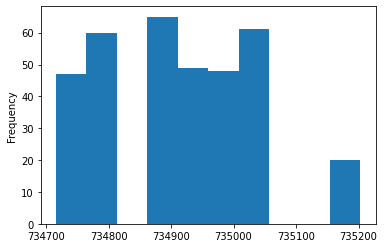

In [24]:
X_train.iloc[:,0].plot(kind='hist')

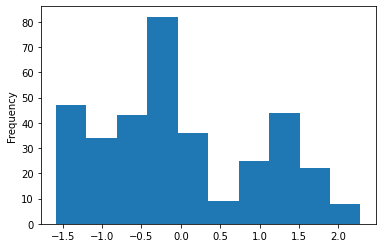

In [25]:
X_train_scaled.iloc[:,0].plot(kind='hist')

In [27]:
cat_col = X_train.columns[3]
cat_col

'X4 number of convenience stores'

In [28]:
X_train_scaled.insert(2,cat_col,X_train[cat_col])

In [30]:
cat_col1 = X_train.columns[0]
X_train_scaled.insert(0,cat_col1,X_train[cat_col1])

In [31]:
X_train_scaled.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,734808,1.238607,-0.781211,10,1.115137,0.447527
1,734808,0.136218,-0.609062,9,0.903595,0.400364
2,735050,-0.410568,-0.410767,5,1.474118,0.684633
3,735020,-0.410568,-0.410767,5,1.474118,0.684633
4,734777,-1.142554,-0.543861,5,0.825869,0.590308


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
mdl = LinearRegression()
mdl.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
c = mdl.intercept_
c

array([-6026.73090919])

In [35]:
m = mdl.coef_
m

array([[ 0.00824572, -3.21131018, -5.43608603,  1.15998407,  3.36636884,
        -0.35744042]])

In [36]:
coef_df = pd.DataFrame({'col': X_train_scaled.columns,'coeff':m.flatten()})
coef_df.sort_values('coeff',key=lambda x:abs(x),ascending=False)


,col,coeff
2,X3 distance to the nearest MRT station,-5.436086
4,X5 latitude,3.366369
1,X2 house age,-3.211310
3,X4 number of convenience stores,1.159984
5,X6 longitude,-0.357440
0,X1 transaction date,0.008246


## Interpreting the Model

From the above table we notice that.
- if X3 distance increases than price of the house will reduce.
- if X2 age increases than price of the house will reduce.
- if X4 no of stores increases than price of the house increase.
- X6 longitude and X5 latitude are depends on city so we should not consider this columns

so as per above coefficients X3 distance nearest MRT stations has high impact on our model.

In [37]:
y_learnt = mdl.predict(X_train_scaled)
y_learnt[:5]


array([[47.75348601],
       [48.50252667],
       [48.35498341],
       [48.10761179],
       [47.02952318]])

In [38]:
X_test.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
350,735203,13.2,492.2313,5,24.96515,121.53737
351,734777,4.0,2180.2450,3,24.96324,121.51241
352,734777,18.4,2674.9610,3,24.96143,121.50827
353,735020,4.1,2147.3760,3,24.96299,121.51284
354,734989,12.2,1360.1390,1,24.95204,121.54842


In [39]:
scaled_vals2 = scaler.transform(X_test[Continous_col])
scaled_vals2[:5]

array([[-0.41938684, -0.46492593, -0.31357477,  0.26210562],
       [-1.23074567,  0.84571824, -0.46662239, -1.35047718],
       [ 0.03920728,  1.22983635, -0.61165705, -1.61794884],
       [-1.22192655,  0.82019738, -0.4866548 , -1.3226963 ],
       [-0.50757802,  0.20895377, -1.3640744 ,  0.97600946]])

In [40]:
X_test_scaled = pd.DataFrame(scaled_vals2,columns=Continous_col)
X_test_scaled.head()

,X2 house age,X3 distance to the nearest MRT station,X5 latitude,X6 longitude
0,-0.419387,-0.464926,-0.313575,0.262106
1,-1.230746,0.845718,-0.466622,-1.350477
2,0.039207,1.229836,-0.611657,-1.617949
3,-1.221927,0.820197,-0.486655,-1.322696
4,-0.507578,0.208954,-1.364074,0.976009


In [41]:
X_test_scaled.describe().round(3)

,X2 house age,X3 distance to the nearest MRT station,X5 latitude,X6 longitude
count,64.000,64.000,64.000,64.000
mean,-0.139,-0.036,-0.017,0.020
std,1.022,0.859,0.963,0.943
min,-1.584,-0.809,-2.964,-2.391
25%,-1.017,-0.686,-0.584,-0.441
50%,-0.274,-0.487,0.150,0.355
75%,0.297,0.594,0.766,0.632
max,2.182,2.364,1.803,1.701


In [42]:
X_test_scaled.insert(2,cat_col,X_test.reset_index()[cat_col])

In [43]:
X_test_scaled.insert(0,cat_col1,X_test.reset_index()[cat_col1])

In [44]:
X_test_scaled.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,735203,-0.419387,-0.464926,5,-0.313575,0.262106
1,734777,-1.230746,0.845718,3,-0.466622,-1.350477
2,734777,0.039207,1.229836,3,-0.611657,-1.617949
3,735020,-1.221927,0.820197,3,-0.486655,-1.322696
4,734989,-0.507578,0.208954,1,-1.364074,0.976009


In [45]:
y_pred = mdl.predict(X_test_scaled)
y_pred[:5]

array([[44.07231077],
       [33.78160366],
       [27.22265678],
       [35.81835992],
       [30.49618419]])

In [48]:
from sklearn.metrics import mean_squared_error as mse

In [49]:
test_mse = mse(y_test,y_pred)
test_mse

64.80470057156016

In [50]:
rmse = np.sqrt(test_mse)
rmse

8.050136680303023

In [46]:
from sklearn.metrics import r2_score

In [47]:
r2scr = r2_score(y_test,y_pred)
r2scr

0.5939314028121951

In [51]:
n= X.shape[0]
k= X.shape[1]
n,k

(414, 6)

In [53]:
Adj_R2 = 1-(((1-r2scr)*(n-1))/(n-k-1))
Adj_R2

0.5879451335661833